AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [26]:
import pandas as pd


df = pd.read_csv('titanic.csv')


print("Print the first 10 rows of the dataset:")
print(df.head(10))


print("\nPrint the last 20 rows of the dataset:")
print(df.tail(20))


print("\nPrint dataset's information:")
print(df.info())


print("\nDescribe the dataset:")
print(df.describe())


Print the first 10 rows of the dataset:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCart

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


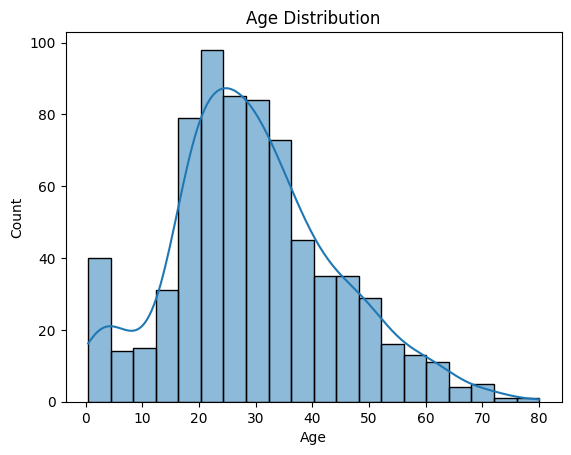

Median Age: 28.0
Missing values count after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('titanic.csv')

# 1. 
print("Missing values count:")
print(df.isnull().sum())

# 2. 
# 2.1 
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# 2.2 
median_age = df['Age'].median()
print(f"Median Age: {median_age}")

# 2.3 
df['Age'].fillna(median_age, inplace=True)

# 3. 
most_common_cabin = df['Cabin'].mode()[0]
df['Cabin'].fillna(most_common_cabin, inplace=True)

# 4. 
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# 5. 
df.loc[df['Survived'] == -1, 'Survived'] = 0

# 6. 
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Fare'].fillna(df['Fare'].median(), inplace=True)


print("Missing values count after handling:")
print(df.isnull().sum())

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

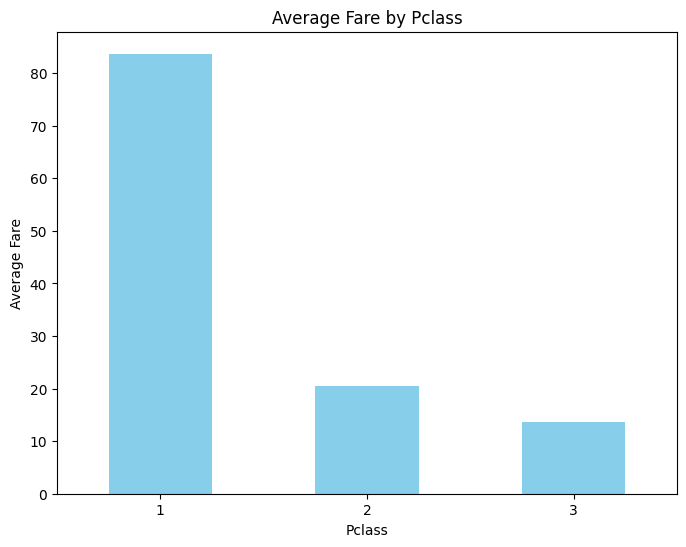

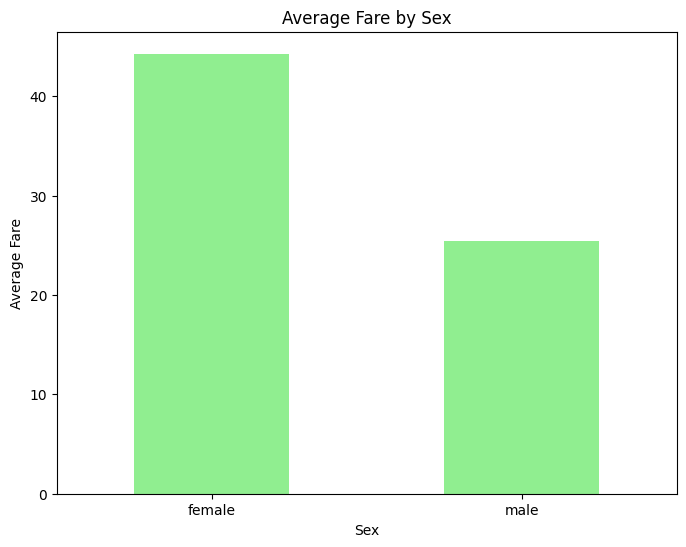

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('titanic.csv')


df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)


avg_fare_pclass = df.groupby('Pclass')['Fare'].mean()


plt.figure(figsize=(8,6))
avg_fare_pclass.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


avg_fare_sex = df.groupby('Sex')['Fare'].mean()


plt.figure(figsize=(8,6))
avg_fare_sex.plot(kind='bar', color='lightgreen')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

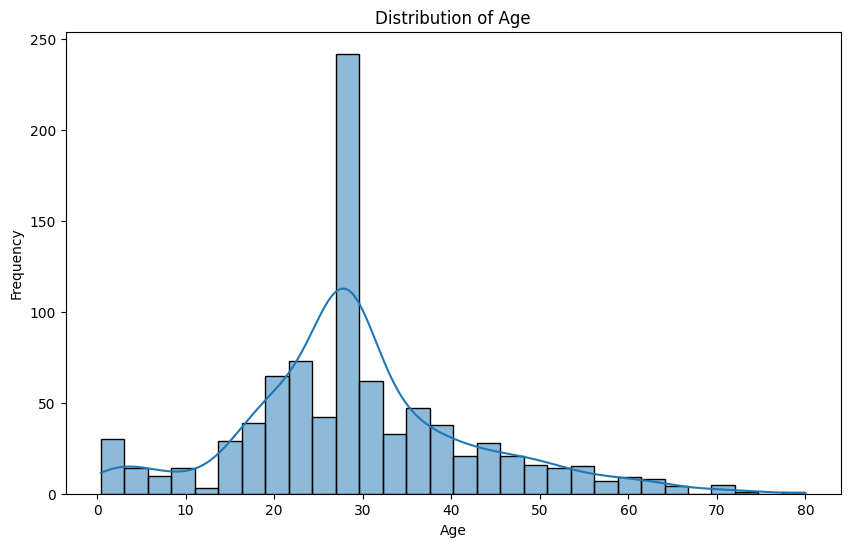

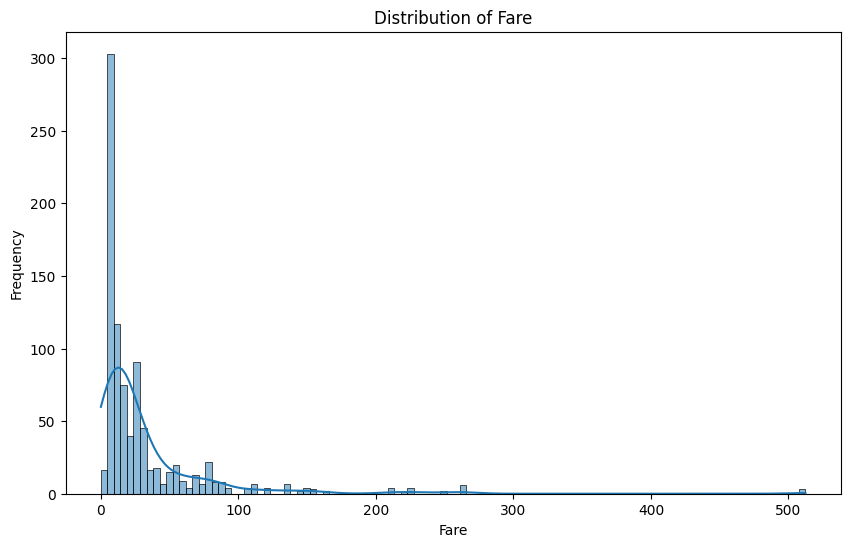

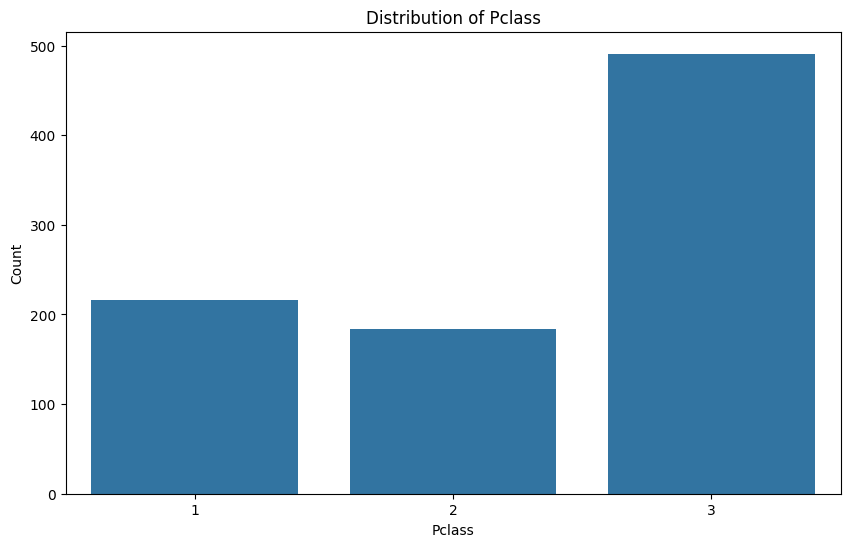

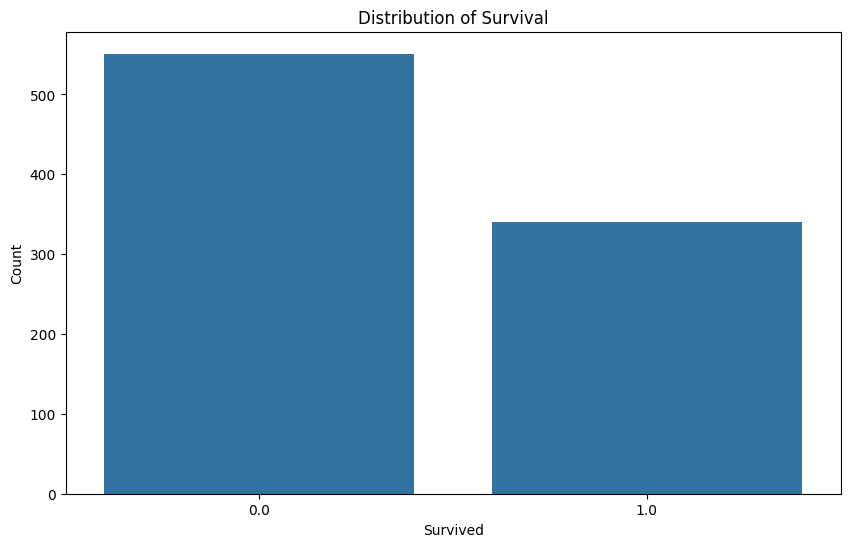

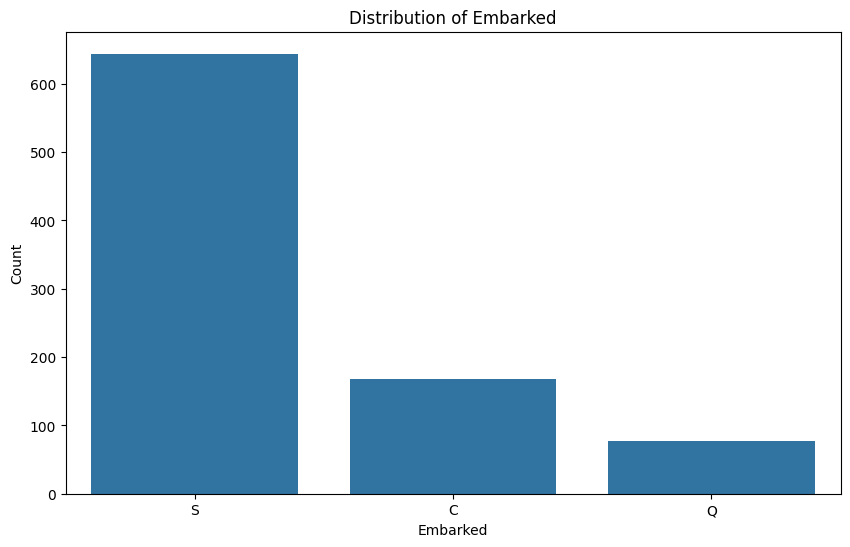

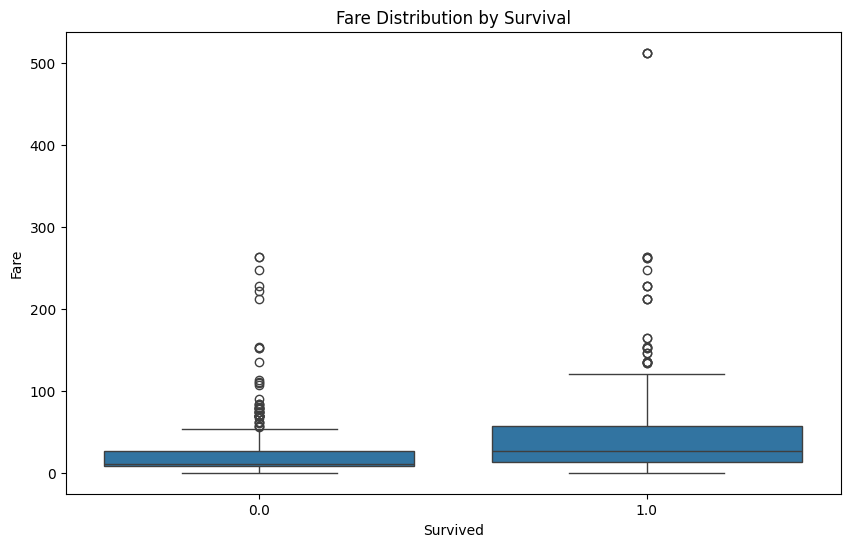

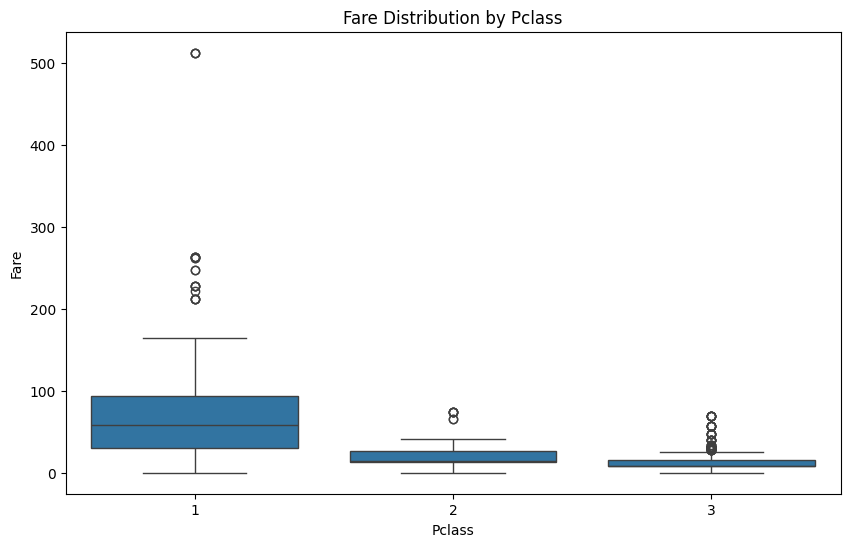

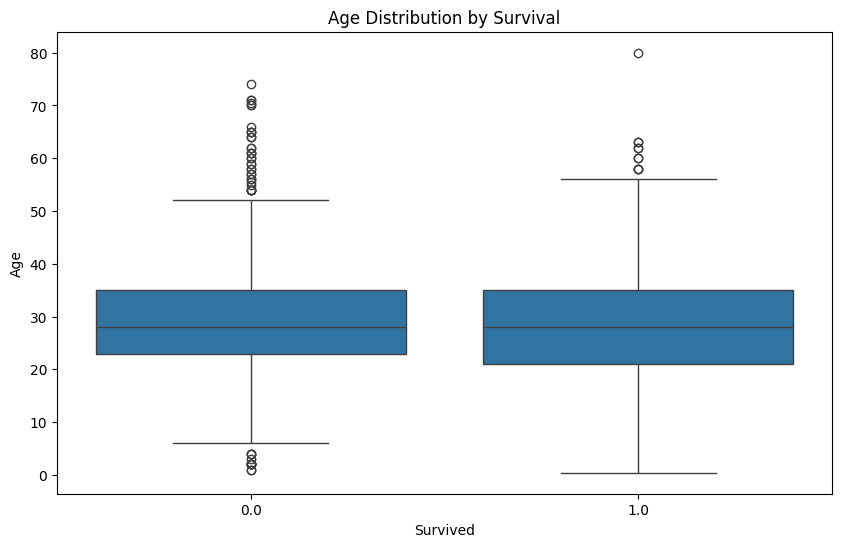

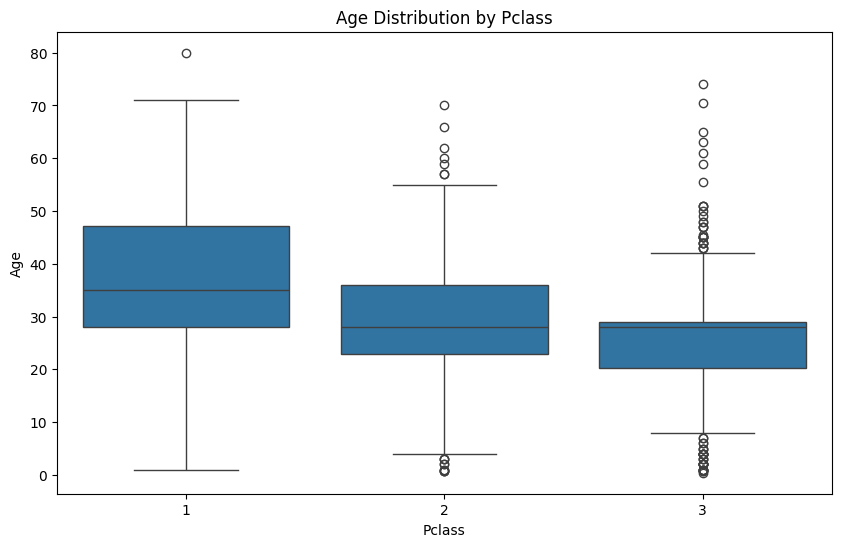

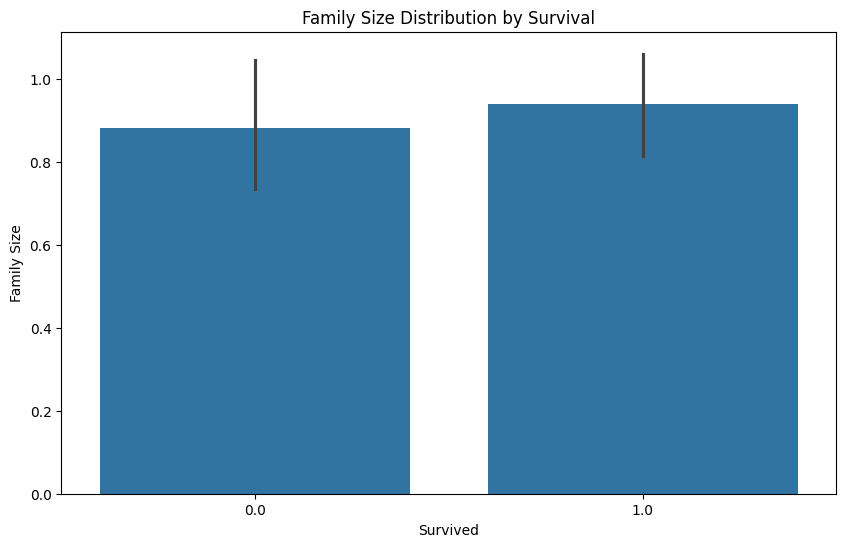

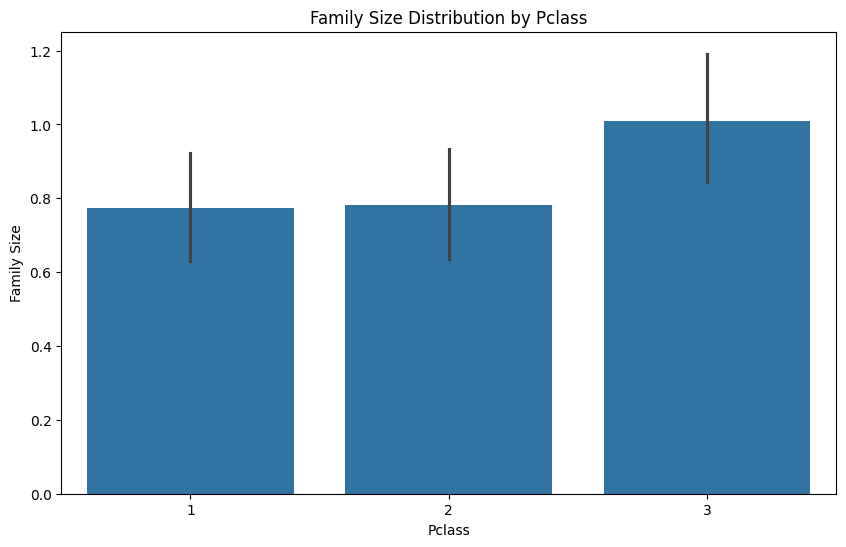

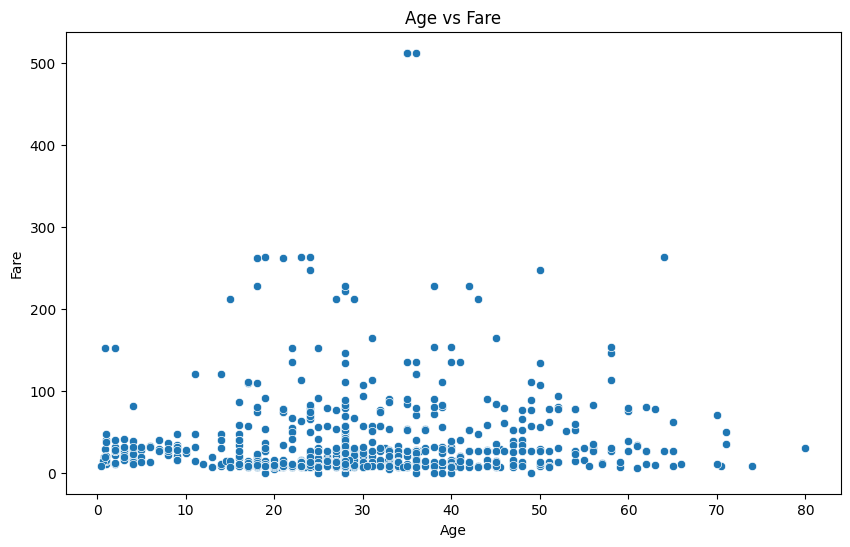

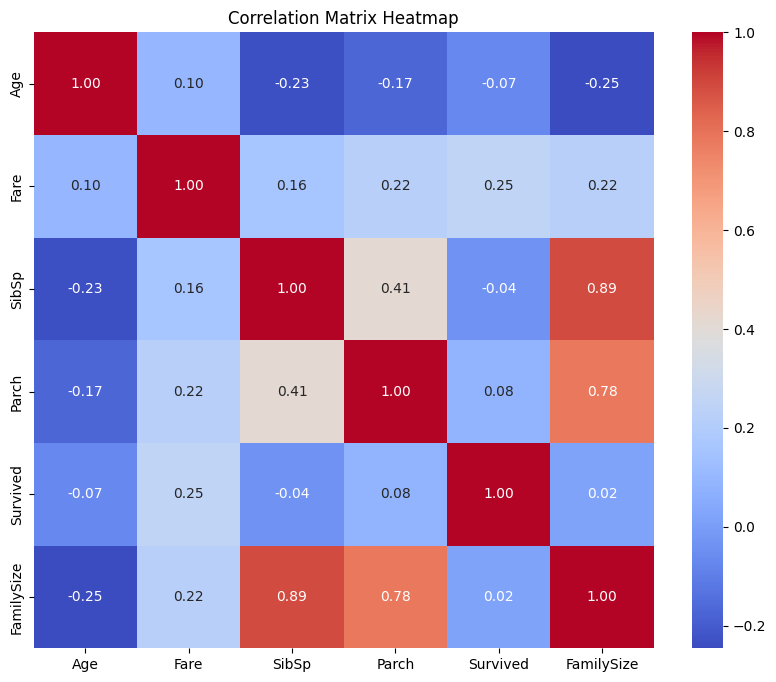

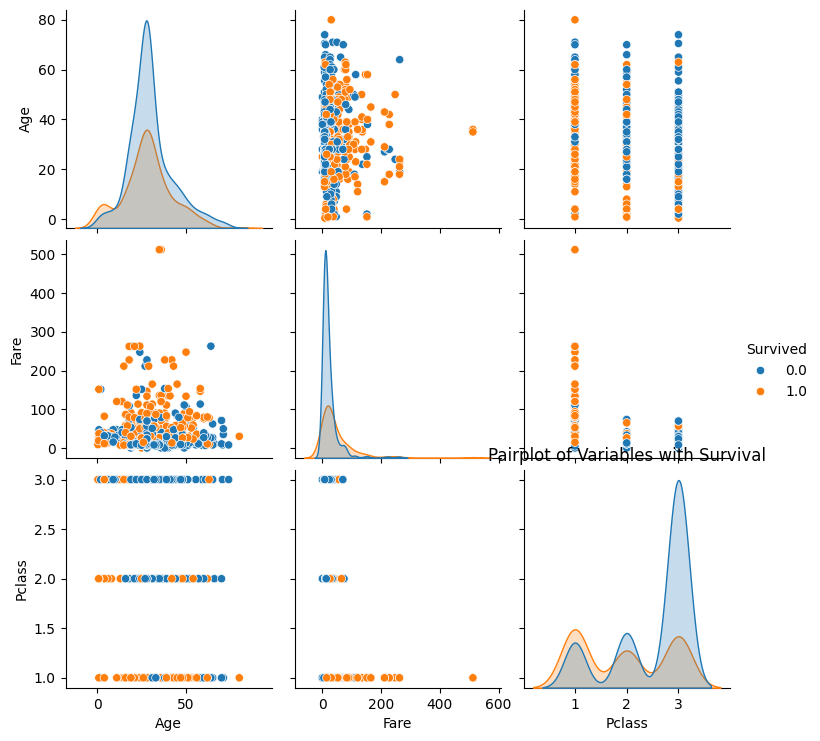

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('titanic.csv')


df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)


df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
mode_survived = df['Survived'].mode()[0]
df['Survived'].fillna(mode_survived, inplace=True)


df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce').fillna(0).astype(int)
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce').fillna(0).astype(int)


df['FamilySize'] = df['SibSp'] + df['Parch']


df = df[df['Survived'].apply(lambda x: isinstance(x, (int, float)))]


columns_for_corr = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'FamilySize']
df_for_corr = df[columns_for_corr].dropna()


plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', data=df, order=['S', 'C', 'Q'])
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x='Survived', y='FamilySize', data=df)
plt.title('Family Size Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='FamilySize', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.title('Pairplot of Variables with Survival')
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

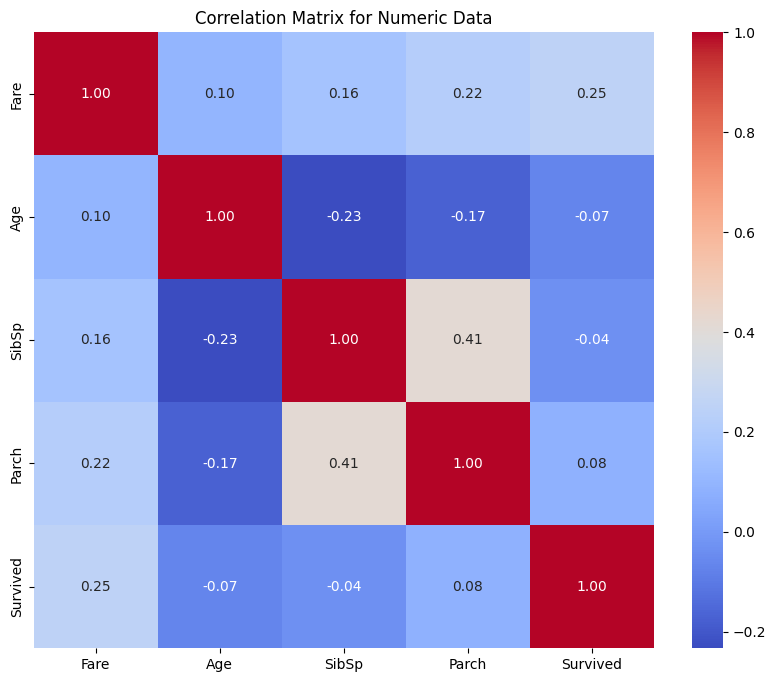

The correlation between 'Age' and 'Fare' is: 0.10


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('titanic.csv')


numeric_cols = ['Fare', 'Age', 'SibSp', 'Parch', 'Survived']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Data')
plt.show()


age_fare_corr = corr_matrix.loc['Age', 'Fare']
print(f"The correlation between 'Age' and 'Fare' is: {age_fare_corr:.2f}")




